<a href="https://www.kaggle.com/code/sahilr05/spotify?scriptVersionId=105137678" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/spotify-top-chart-songs-2022/spotify_top_charts_22.csv


In [2]:
data = pd.read_csv("/kaggle/input/spotify-top-chart-songs-2022/spotify_top_charts_22.csv")

In [3]:
data.head()

,uri,artist_names,track_name,peak_rank,weeks_on_chart,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,tempo,time_signature,duration_ms
0,spotify:track:02MWAaffLxlfxAUY7c5dvx,Glass Animals,Heat Waves,1,65,0.761,0.525,11,-6.900,1,0.0944,0.4400,0.000007,0.0921,80.870,4,238805
1,spotify:track:5PjdY0CKGZdEuoNab3yDmX,"The Kid LAROI, Justin Bieber",STAY (with Justin Bieber),1,37,0.591,0.764,1,-5.484,1,0.0483,0.0383,0.000000,0.1030,169.928,4,141806
2,spotify:track:3IAfUEeaXRX9s9UdKOJrFI,Anitta,Envolver,3,3,0.812,0.736,4,-5.421,0,0.0833,0.1520,0.002540,0.0914,91.993,4,193806
3,spotify:track:1HhNoOuqm1a5MXYEgAFl8o,"Imagine Dragons, JID, Arcane, League of Legends",Enemy (with JID) - from the series Arcane Leag...,3,21,0.728,0.783,11,-4.424,0,0.2660,0.2370,0.000000,0.4340,77.011,4,173381
4,spotify:track:4fouWK6XVHhzl78KzQ1UjL,GAYLE,abcdefu,1,19,0.695,0.540,4,-5.692,1,0.0493,0.2990,0.000000,0.3670,121.932,4,168602


In [4]:
data.shape

(646, 17)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 646 entries, 0 to 645
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   uri               646 non-null    object 
 1   artist_names      646 non-null    object 
 2   track_name        646 non-null    object 
 3   peak_rank         646 non-null    int64  
 4   weeks_on_chart    646 non-null    int64  
 5   danceability      646 non-null    float64
 6   energy            646 non-null    float64
 7   key               646 non-null    int64  
 8   loudness          646 non-null    float64
 9   mode              646 non-null    int64  
 10  speechiness       646 non-null    float64
 11  acousticness      646 non-null    float64
 12  instrumentalness  646 non-null    float64
 13  liveness          646 non-null    float64
 14  tempo             646 non-null    float64
 15  time_signature    646 non-null    int64  
 16  duration_ms       646 non-null    int64  
dt

In [6]:
data.isnull().sum()

uri                 0
artist_names        0
track_name          0
peak_rank           0
weeks_on_chart      0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
tempo               0
time_signature      0
duration_ms         0
dtype: int64

In [7]:
data.duplicated().sum()

0

In [8]:
data.describe()

,peak_rank,weeks_on_chart,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,tempo,time_signature,duration_ms
count,646.000000,646.000000,646.000000,646.000000,646.000000,646.000000,646.000000,646.000000,646.000000,646.000000,646.000000,646.000000,646.000000,646.000000
mean,65.922601,19.498452,0.674426,0.640836,5.086687,-6.356034,0.577399,0.109797,0.255699,0.013686,0.176478,121.091571,3.927245,203629.859133
std,57.004503,37.813937,0.151527,0.165478,3.622314,2.627462,0.494356,0.102167,0.262595,0.077836,0.133792,28.267951,0.351256,54966.666438
min,1.000000,1.000000,0.193000,0.021800,0.000000,-31.160000,0.000000,0.023200,0.000017,0.000000,0.026400,66.165000,1.000000,36935.000000
25%,15.000000,1.000000,0.569000,0.532500,1.000000,-7.716250,0.000000,0.041325,0.040400,0.000000,0.093100,98.428500,4.000000,169901.500000
50%,51.500000,5.000000,0.700000,0.652000,5.000000,-5.930500,1.000000,0.063450,0.155500,0.000002,0.120000,119.966000,4.000000,196388.500000
75%,108.750000,19.750000,0.790750,0.769000,8.000000,-4.595750,1.000000,0.135750,0.424500,0.000105,0.231750,139.968250,4.000000,229213.500000
max,200.000000,269.000000,0.985000,0.972000,11.000000,-0.514000,1.000000,0.611000,0.969000,0.908000,0.968000,205.863000,5.000000,613027.000000


<AxesSubplot:>

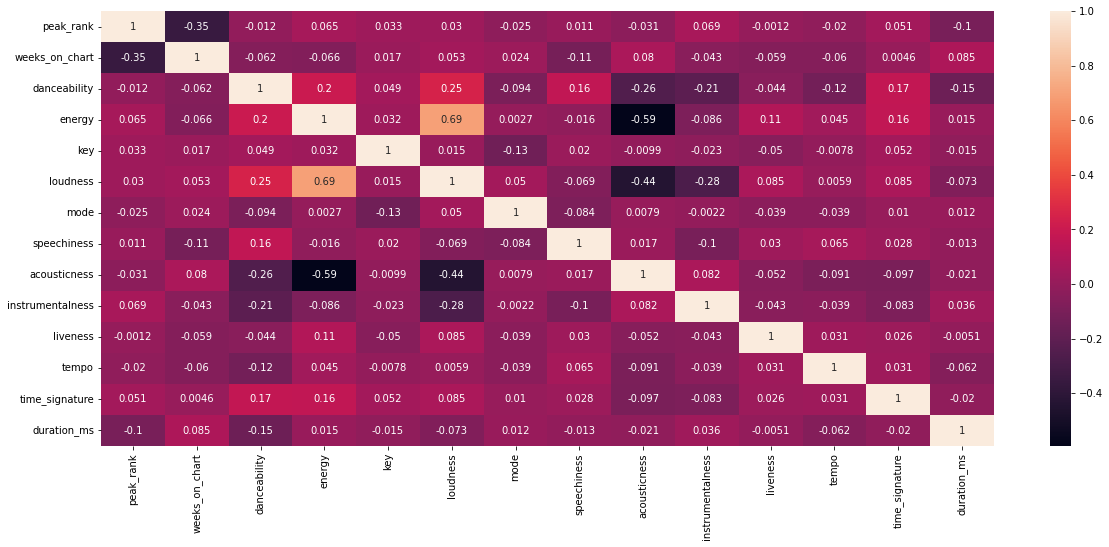

In [9]:
plt.figure(figsize=(20,8))
sns.heatmap(data.corr(),annot=True)

<B>Both side outliear </B> = duration_ms </br>
<B>Upper side outliear </B>= tempo, liveness, instrumentalness, speechiness, weeks_on_chart</br>
<B>Lower side outliear </B>= loud_ness

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='duration_ms', ylabel='Density'>

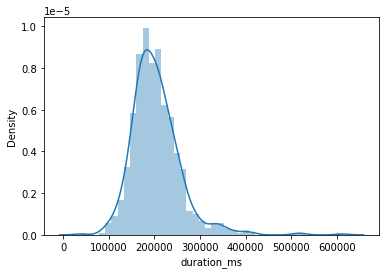

In [10]:
sns.distplot(data["duration_ms"])

<AxesSubplot:>

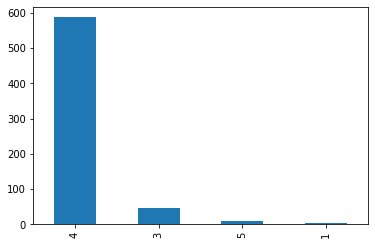

In [11]:
data["time_signature"].value_counts().plot(kind="bar")

<AxesSubplot:>

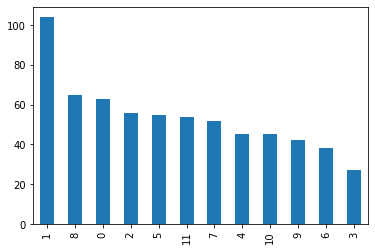

In [12]:
data["key"].value_counts().sort_values(ascending=False).plot(kind="bar")

<AxesSubplot:xlabel='energy', ylabel='loudness'>

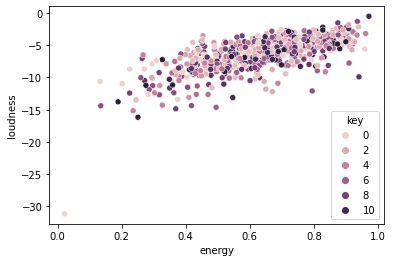

In [13]:
sns.scatterplot(data=data,x= "energy",y="loudness",hue="key")

<AxesSubplot:>

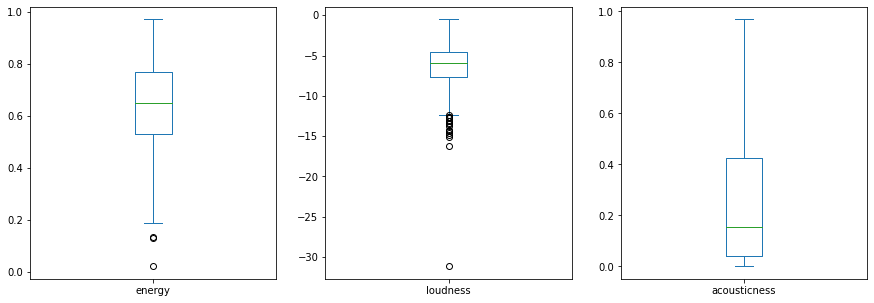

In [14]:
f, ax = plt.subplots(1,3,figsize=(15,5))

data["energy"].plot(kind="box",ax=ax[0])
data["loudness"].plot(kind="box",ax=ax[1])
data["acousticness"].plot(kind="box",ax=ax[2])


In [15]:
# Remove Energy Outliers
iqr = 1.5 * np.percentile(data["energy"],75) - np.percentile(data["energy"],55)
data.drop(data[(data["energy"] > (iqr + np.percentile(data["energy"],75))) | (data["energy"] < (np.percentile(data["energy"],55)-iqr))].index,inplace=True)

# Remove loudness Outliers
iqr = 1.5 * np.percentile(data["loudness"],75) - np.percentile(data["loudness"],15)
data.drop(data[(data["loudness"] < (np.percentile(data["loudness"],10)-iqr))].index,inplace=True)

# Remove acousticness Outliers 
iqr = 1.5 * np.percentile(data["acousticness"],65) - np.percentile(data["acousticness"],25)
data.drop(data[(data["acousticness"] > (iqr + np.percentile(data["acousticness"],65)))].index,inplace =True)

# Remove Duration Outliears
iqr = 1.5 * np.percentile(data["duration_ms"],60) - np.percentile(data["duration_ms"],25)
data.drop(data[(data["duration_ms"] > (iqr + np.percentile(data["duration_ms"],60))) | (data["duration_ms"] < (np.percentile(data["duration_ms"],25)-iqr))].index,inplace=True)

Text(0.5, 1.0, 'Loudness & Energy Relations')

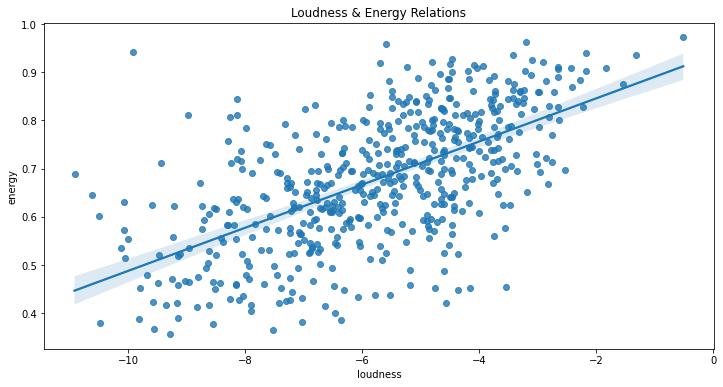

In [16]:
plt.figure(figsize=(12,6))
sns.regplot(data=data,x="loudness",y="energy")
plt.title("Loudness & Energy Relations")

# Energy & Loudness is linearly depandent 
# when Loudness Increase Then Energy Increase 

<AxesSubplot:xlabel='acousticness', ylabel='energy'>

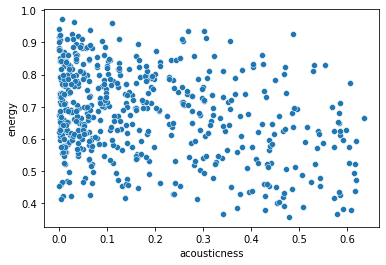

In [17]:
sns.scatterplot(data=data,x="acousticness",y="energy")

#  acousticness & energy have negitive Corration
#  if acoustics Increase then energy will decrease